# Business Case

- **Based on the given features,predict whether the person has diabetes or not**

## Importing basic libraries


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [60]:
## Importing data
main_data = pd.read_csv('diabetes.csv')
main_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [61]:
data = main_data.copy()
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## Domain analysis
- **1)Pregnancies:**-Some women have diabetes before they get pregnant. This is called pregestational diabetes. Other women may get a type of diabetes that only happens in pregnancy. This is called gestational diabetes. Pregnancy can change how a woman's body uses glucose. This can make diabetes worse, or lead to gestational diabetes.

If you have gestational diabetes during pregnancy, generally your blood sugar returns to its usual level soon after delivery. But if you've had gestational diabetes, you have a higher risk of getting type 2 diabetes. You'll need to be tested for changes in blood sugar more often.

The risk of getting diabetes is 28% if the patient has concived more than 2 or 3 times.

- **2)Glucose:** -Glucose is your body's source of fuel. Your pancreas makes insulin to move glucose from your bloodstream into muscle, fat, and liver cells, where your body turns it into energy. People with diabetes have too much blood sugar because their body cannot move glucose into fat, liver, and muscle cells to be changed into and stored for energy.

- **3)Blood Pressure:**-A person with diabetes is twice as likely to have high blood pressure as someone who does not have diabetes. When you have diabetes, high blood sugar can damage your blood vessels and the nerves that help your heart pump.Similarly, high blood pressure can create increased strain on your heart and blood vessels. When these two conditions occur together, they increase the risk of heart disease (cardiovascular disease) and stroke.
- **High blood pressure:**-  According to a 2018 article, people with high blood pressure usually have insulin resistance and have an increased risk of developing diabetes compared to those with typical blood pressure. Blood pressure should be below 140/80mmHg for people with diabetes or below 130/80mmHg if you have kidney or eye disease or any condition that affects blood vessels and blood supply to the brain.

- **4)Skin Thickness:** -Skin thickening is frequently observed in patients with diabetes. Affected areas of skin can appear thickened, waxy, or edematous. These patients are often asymptomatic but can have a reduction in sensation and pain. Although different parts of the body can be involved, the hands and feet are most frequently involved.Diabetes can cause changes in the small blood vessels. These changes can cause skin problems called diabetic dermopathy. Dermopathy often looks like light brown, scaly patches. These patches may be oval or circular.


- **5)Insulin:**-Insulin is a hormone your pancreas makes to lower blood glucose, or sugar. If you have diabetes, your pancreas either doesn't make enough insulin or your body doesn't respond well to it. Your body needs insulin to keep the blood sugar level in a healthy range.Type 1 diabetes causes damage to the beta cells in your pancreas that make insulin. As a result, your body can't produce enough of this hormone. Type 2 diabetes gradually makes it harder for your be


- **6)BMI:**-Body mass index has a strong relationship to diabetes and insulin resistance. In obese individuals, the amount of nonesterified fatty acids, glycerol, hormones, cytokines, proinflammatory markers, and other substances that are involved in the development of insulin resistance, is increased. The pathogenesis in the development of diabetes is based on the fact that the β-islet cells of the pancreas are impaired, causing a lack of control of blood glucose. The development of diabetes becomes more inevitable if the failure of β-islet cells of the pancreas is accompanied by insulin resistance. Weight gain and body mass are central to the formation and rising incidence of type 1 and type 2 diabetes.

- **8)Age:** -The prevalence of both type 2 diabetes and prediabetes increases with advancing age. The most important factors leading to hyperglycaemia are as follows: deficiency of insulin secretion developing with age, and growing insulin resistance caused by a change in body composition and sarcopaenia.The process of aging of the human body leads to impairment of energy homeostasis and abnormalities in carbohydrate metabolism. The most important causes of hyperglycaemia are thought to be deficiency of insulin secretion developing with age and growing insulin resistance.



## Basic checks

In [63]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA

## Univariate analysis

In [67]:
import sweetviz as sv          # It will help to see how many categorical and numerical

report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


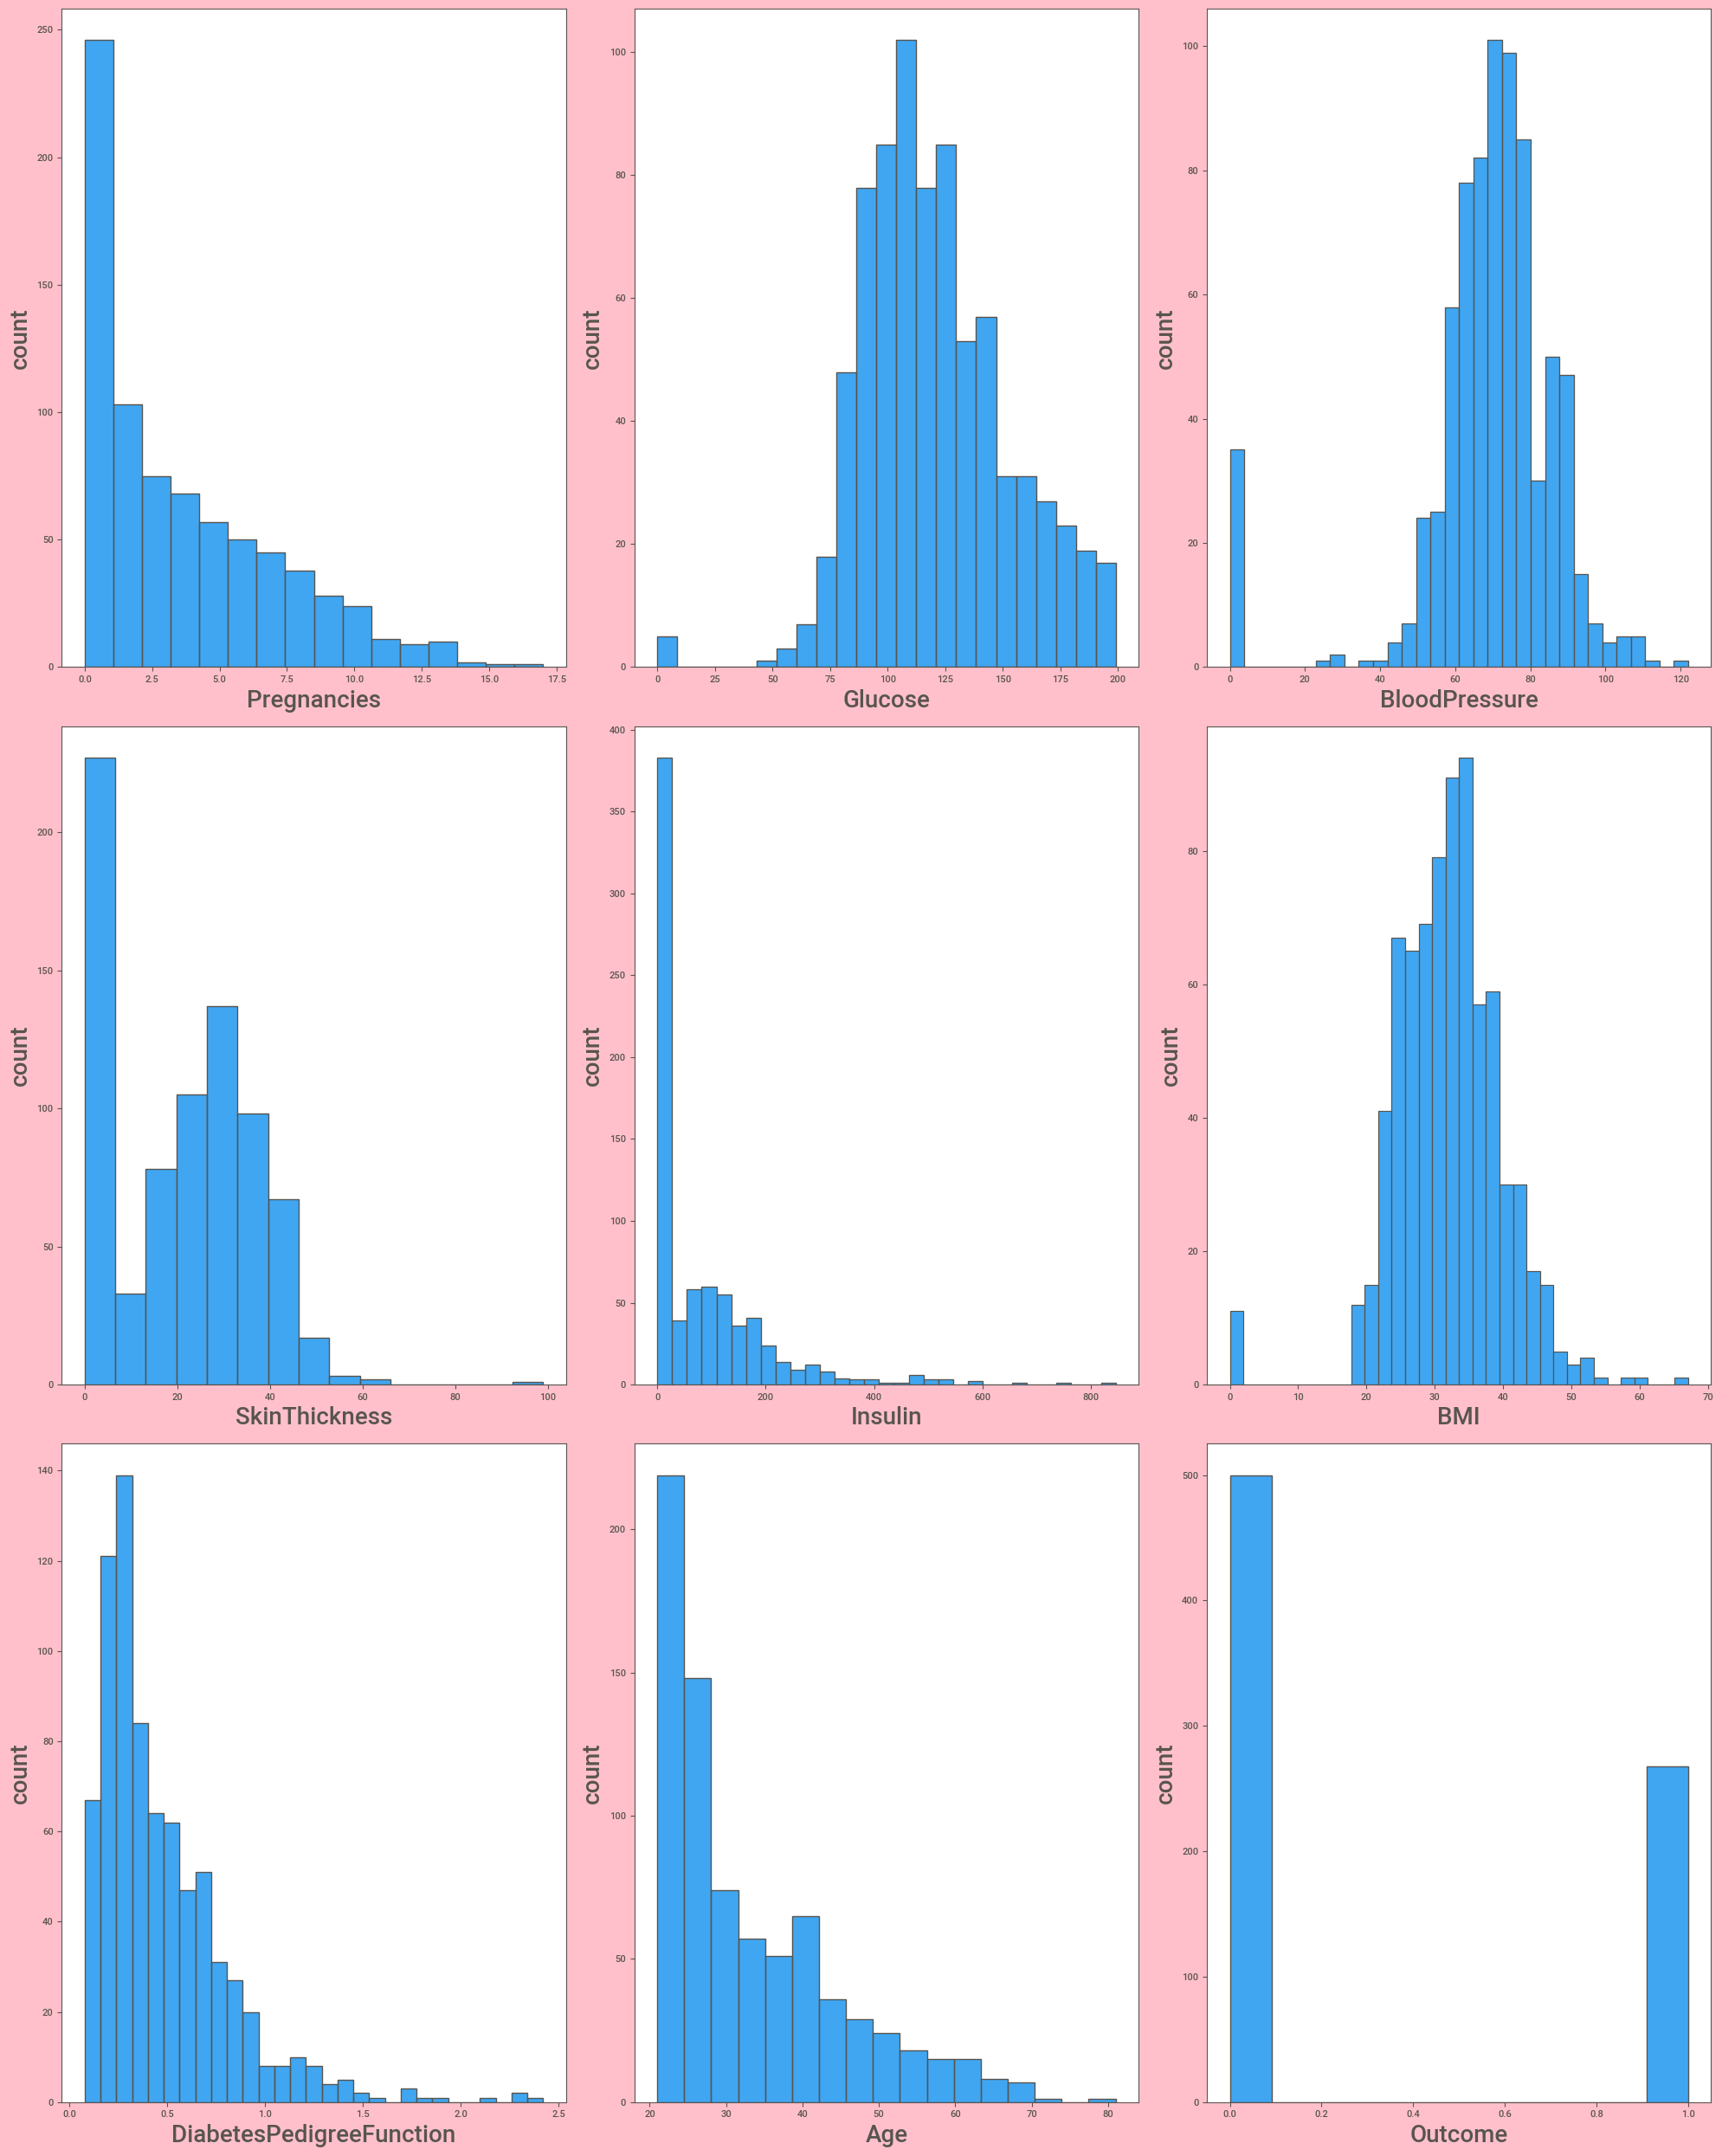

In [68]:
plt.figure(figsize = (20,25),facecolor = 'pink')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('count',fontsize = 20)
    plotnumber+=1
plt.tight_layout()

## Bi variate analysis

## Multi variate Analysis

# Data preprocessing

In [69]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [71]:
#Glucose, BloodPressure,SkinThickness,Insulin,BMI

## Glucose

In [72]:
data.Glucose.mean()

120.89453125

In [73]:
data.loc[(data.Glucose==0),'Glucose'] = 120.89

### BloodPressure 

In [74]:
data.BloodPressure.mean()

69.10546875

In [75]:
data.loc[(data.BloodPressure==0),'BloodPressure'] = 69.10

### SkinThickness

In [76]:
data.SkinThickness.median()

23.0

In [77]:
data.loc[(data.SkinThickness==0),'SkinThickness'] = 20.53

### Insulin

In [78]:
data.Insulin.median()

30.5

In [79]:
data.loc[(data.Insulin==0),'Insulin'] = 30.5

### BMI

In [80]:
data.BMI.median()

32.0

In [81]:
data.loc[(data.BMI==0),'BMI'] = 32

In [82]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681576,72.254557,26.604570,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115997,9.632446,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.530000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Feature Selection

In [83]:
data.drop('Outcome',axis = 1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00,30.5,33.6,0.627,50
1,1,85.0,66.0,29.00,30.5,26.6,0.351,31
2,8,183.0,64.0,20.53,30.5,23.3,0.672,32
3,1,89.0,66.0,23.00,94.0,28.1,0.167,21
4,0,137.0,40.0,35.00,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.0,32.9,0.171,63
764,2,122.0,70.0,27.00,30.5,36.8,0.340,27
765,5,121.0,72.0,23.00,112.0,26.2,0.245,30
766,1,126.0,60.0,20.53,30.5,30.1,0.349,47


<Axes: >

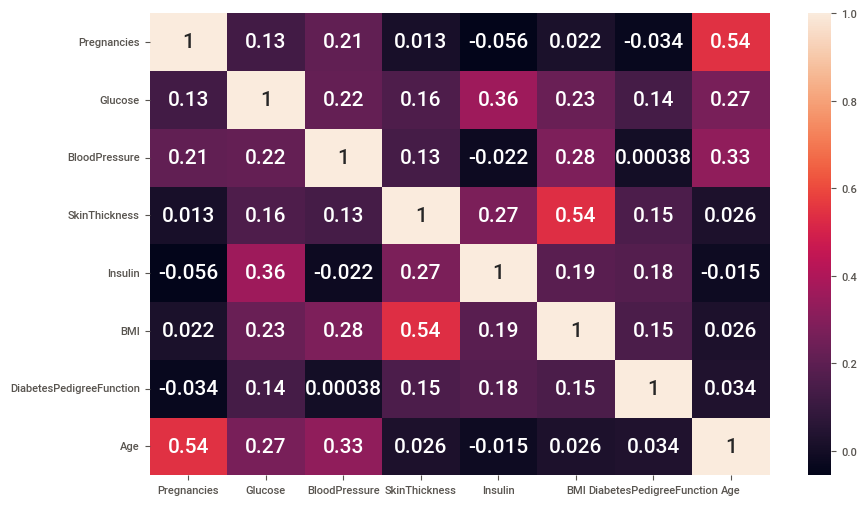

In [84]:
plt.figure(figsize=(10,6))  # width,height
sns.heatmap(data.drop('Outcome',axis = 1).corr(),annot= True,annot_kws={'size':15})

## Splitting data

In [105]:
## X,y,split

X = data.drop('Outcome',axis = 1)
y = data.Outcome

In [106]:
## train,test,splitting

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

### Scaling

In [107]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(X_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [115]:
X_test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.transform(X_test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [110]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


## Model Implementation

In [90]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [91]:
y_pred = model_lr.predict(X_test)

In [92]:
model_lr.predict_proba(X_test)

array([[0.86780587, 0.13219413],
       [0.71296287, 0.28703713],
       [0.90508774, 0.09491226],
       [0.87787465, 0.12212535],
       [0.88415416, 0.11584584],
       [0.60690327, 0.39309673],
       [0.60937763, 0.39062237],
       [0.4319977 , 0.5680023 ],
       [0.63216781, 0.36783219],
       [0.49749619, 0.50250381],
       [0.62687889, 0.37312111],
       [0.58313199, 0.41686801],
       [0.07649551, 0.92350449],
       [0.6850463 , 0.3149537 ],
       [0.9071578 , 0.0928422 ],
       [0.93459555, 0.06540445],
       [0.91065499, 0.08934501],
       [0.5113587 , 0.4886413 ],
       [0.75196188, 0.24803812],
       [0.93350699, 0.06649301],
       [0.74001595, 0.25998405],
       [0.37635884, 0.62364116],
       [0.86590644, 0.13409356],
       [0.57433631, 0.42566369],
       [0.78143687, 0.21856313],
       [0.6338168 , 0.3661832 ],
       [0.59302501, 0.40697499],
       [0.61068704, 0.38931296],
       [0.91039278, 0.08960722],
       [0.17434279, 0.82565721],
       [0.

# Model Evaluation

In [93]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [94]:
accuracy_score(y_test,y_pred)

0.7727272727272727

In [95]:
precision_score(y_test,y_pred)

0.7111111111111111

In [97]:
recall_score(y_test,y_pred)

0.5925925925925926

In [98]:
f1_score(y_test,y_pred)

0.6464646464646464

In [101]:
confusion_matrix(y_test,y_pred)

array([[87, 13],
       [22, 32]], dtype=int64)

In [116]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Outcome,,
0,87,13
1,22,32


In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.71      0.59      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



In [3]:
pwd

'C:\\Users\\Admin\\Data Science\\ML jeeva\\Logistic'